In [34]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Standard Normal Distribution

"Standard" refers to the fact that the distribution has mean equal to 0 and standard deviation equal to 1.

"Normal" refers to the fact that the distribution is bell-shaped (unimodal) and symmetric.

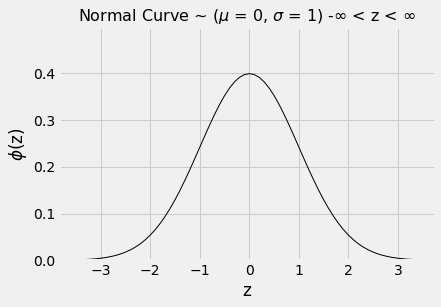

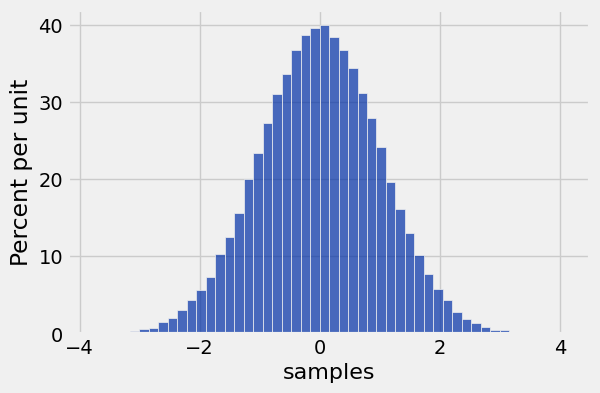

In [35]:
# Random sample of 100,000 values drawn from the standard normal distribution
samples_array = np.random.standard_normal(size=100000)
Table().with_column('samples', samples_array).hist(bins=50)

### What percent of data lies between -1 and 1 on this curve?


In [47]:

# Step 1: Use np.count_nonzero to find the number of values less than -1.
lefttail = np.count_nonzero(samples_array<=-1)

# Step 2: Use np.count_nonzero to find the number of values greater than 1.
righttail = np.count_nonzero(samples_array>=1)

# Step 3: Subtract from the total.
total = len(samples_array) - lefttail - righttail

# Step 4: Convert to a percent.
total = (total / len(samples_array) * 100)
total



68.337999999999994

### What percent of data lies between -2 and 2 on this curve?


In [50]:
lefttail1 = np.count_nonzero(samples_array<=-2)
righttail1 = np.count_nonzero(samples_array>=2)
total1 = len(samples_array) - lefttail1 - righttail1
total1 = (total1 / len(samples_array) * 100)
total1


95.366

### What percent of data lies between -3 and 3 on this curve?

In [51]:
lefttail1 = np.count_nonzero(samples_array<=-2)
righttail1 = np.count_nonzero(samples_array>=2)
total1 = len(samples_array) - lefttail1 - righttail1
total1 = (total1 / len(samples_array) * 100)
total1

95.366

## Bell-Shaped, Symmetric, Nonstandard Distribution

In [39]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


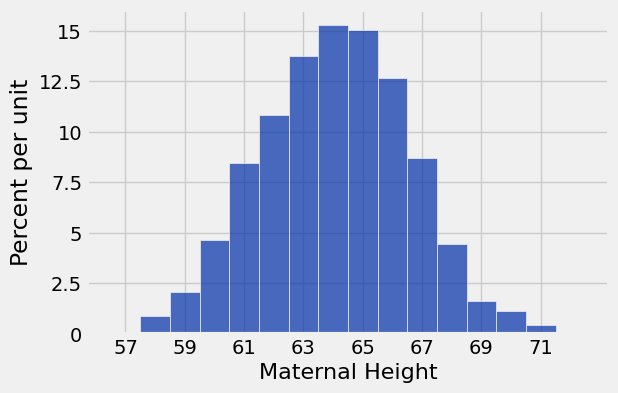

In [40]:

births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.xticks(np.arange(57, 72, 2));

### What percent of the data is at most one standard deviation from the mean?

In [41]:
# Computing the mean and standard deviation
heights = births.column('Maternal Height')
print(np.mean(heights))
print(np.std(heights))

64.0494037479
2.52502544097


In [58]:
# Modify the example from the standard normal
mean = np.mean(heights)
sd = np.std(heights)

mean_plus_sd = mean + sd
mean_minus_sd = mean - sd


lefttail1 = np.count_nonzero(heights<=mean_minus_sd)
righttail1 = np.count_nonzero(heights>=mean_plus_sd)
total1 = len(heights) - lefttail1 - righttail1
total1 = (total1 / len(heights) * 100)

total1

67.376490630323687

In [60]:
### What percent of the data is at most two standard deviations from the mean?
mean = np.mean(heights)
sd = np.std(heights)

mean_plus_sd = mean + sd * 2
mean_minus_sd = mean - sd * 2


lefttail1 = np.count_nonzero(heights<=mean_minus_sd)
righttail1 = np.count_nonzero(heights>=mean_plus_sd)
total1 = len(heights) - lefttail1 - righttail1
total1 = (total1 / len(heights) * 100)

total1

97.189097103918229

### What percent of the data is at most three standard deviations from the mean?

In [61]:
mean = np.mean(heights)
sd = np.std(heights)

mean_plus_sd = mean + sd * 3
mean_minus_sd = mean - sd *3


lefttail1 = np.count_nonzero(heights<=mean_minus_sd)
righttail1 = np.count_nonzero(heights>=mean_plus_sd)
total1 = len(heights) - lefttail1 - righttail1
total1 = (total1 / len(heights) * 100)

total1

99.659284497444631

Write a function called bounded_by_sd. It takes two inputs: data_arr and num_sd. The function should return the percent of the data in data_arr that is at most num_sd standard deviations from the mean.

In [68]:
def bounded_by_sd(data_arr, num_sd):
    mean = np.mean(data_arr)
    sd = np.std(data_arr)
    mean_plus_sd = mean + sd*num_sd
    mean_minus_sd = mean - sd*num_sd  

    left = np.count_nonzero(data_arr<=mean_plus_sd)
    right = np.count_nonzero(data_arr>=mean_minus_sd)

    total = len(data_arr) - left - right
    total = abs(total/len(data_arr) * 100)

    return total
    

In [74]:
# Test the function on the heights array.

bounded_by_sd(heights, 3)

99.659284497444631

## Summary of "The Empirical Rule"

For bell-shaped and symmetric distributions:

mean ± 1 SD captures about 68% of the data

mean ± 2 SDs captures about 95% of the data

mean ± 3 SDs captures about 99.73% of the data